In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


I will delete the first column, as it is not needed

In [3]:
df.drop('CustomerID', axis = 1, inplace = True)

Next it will just be EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [5]:
df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
print(f'Missing values in Profession: {round((df["Profession"].isnull().sum()/df.shape[0])*100, 2)}' )

Missing values in Profession: 1.75


In [7]:
df.dropna(inplace = True)

Now I need to code Gender and Profession

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
enc_cols = ['Gender','Profession']

In [10]:
encoder = LabelEncoder()
for col in enc_cols:
    df[col+"_"] = encoder.fit_transform(df[col])
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_,Profession_
0,Male,19,15000,39,Healthcare,1,4,1,5
1,Male,21,35000,81,Engineer,3,3,1,2
2,Female,20,86000,6,Engineer,1,1,0,2
3,Female,23,59000,77,Lawyer,0,2,0,7
4,Female,31,38000,40,Entertainment,2,6,0,3


I need to delete the old columns

In [11]:
df.drop(['Gender','Profession'], axis = 1, inplace = True)

In [12]:
df

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_,Profession_
0,19,15000,39,1,4,1,5
1,21,35000,81,3,3,1,2
2,20,86000,6,1,1,0,2
3,23,59000,77,0,2,0,7
4,31,38000,40,2,6,0,3
...,...,...,...,...,...,...,...
1995,71,184387,40,8,7,0,0
1996,91,73158,32,7,7,0,1
1997,87,90961,14,9,2,1,5
1998,77,182109,4,7,2,1,4


Next, I need to standardize the data so that they are about the same 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
sc_tr = scaler.transform(df)
df_1 = pd.DataFrame(sc_tr)

After that I use two methods for better cluster sampling 

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

k_list = []
sil_sc =[]

for i in range(2, 16):
    k_m = KMeans(n_clusters = i, random_state = 42)
    k_m.fit(df_1)
    k_list.append(k_m.inertia_)
    
    cluster_label = k_m.labels_
    
    sil_sc.append(silhouette_score(df_1, cluster_label))

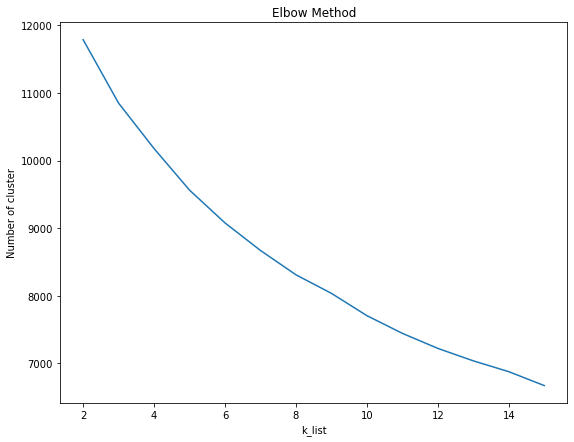

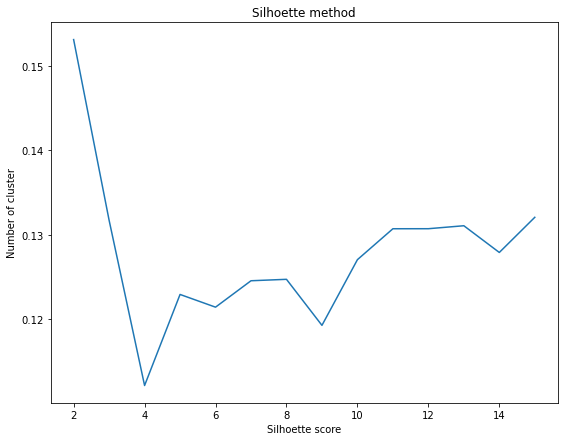

In [15]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(2, 16), k_list)
plt.title('Elbow Method')
plt.xlabel('k_list')
plt.ylabel('Number of cluster')
plt.show()

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 2)
plt.plot(range(2, 16), sil_sc)
plt.title('Silhoette method')
plt.xlabel('Silhoette score')
plt.ylabel('Number of cluster')
plt.show()

In the end these two methods did not work well here, but nevertheless I will take 4 clusters  

In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 3)
pca_res = pca.fit_transform(df_1)
print(f'variance fraction {pca.explained_variance_ratio_}')
print('Dispersion fraction in percent {:.2%}' .format(np.sum(pca.explained_variance_ratio_)))

variance fraction [0.16330217 0.14993903 0.14773784]
Dispersion fraction in percent 46.10%


In [17]:
pca_df = pd.DataFrame(abs(pca.components_), columns=df_1.columns, index = ['pca1', 'pca2', 'pca3'])
print(pca_df)

             0         1         2         3         4         5         6
pca1  0.152758  0.668100  0.021475  0.441234  0.551297  0.075074  0.159978
pca2  0.241333  0.194405  0.745137  0.130065  0.084334  0.040244  0.568407
pca3  0.753830  0.000469  0.017385  0.337464  0.224951  0.289164  0.428178


In [19]:
k_means = KMeans(n_clusters = 4)
y_kmeans = k_means.fit_predict(pca_res)
y_kmeans

array([3, 3, 3, ..., 1, 1, 2])

In [20]:
centrs = k_means.cluster_centers_
centrs

array([[-0.26118739,  1.12943395,  0.48915057],
       [-0.49339647, -0.93044036,  0.85880446],
       [-0.57258411, -0.11808169, -1.06503994],
       [ 1.27846768, -0.11801884, -0.11500796]])

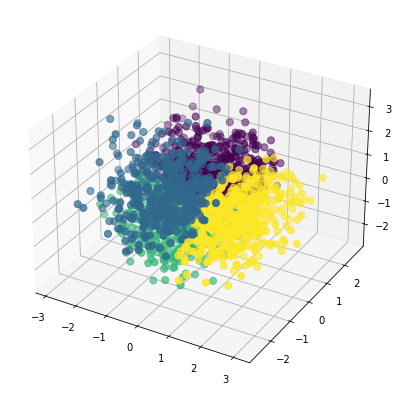

In [21]:
plt.figure(figsize = (10, 7))
ax = plt.axes(projection = '3d')
ax.scatter3D(pca_res[:, 0], pca_res[:, 1], pca_res[:, 2], c=y_kmeans, s=50)
plt.show()